In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.decomposition import PCA

import pickle

In [4]:
#load the data
data = pickle.load(open("./Data/data_images.pickle",mode="rb"))
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,Gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,Female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,Female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,Female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,Female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,Female


### Eigen Face

In [7]:
X = data.drop("Gender",axis=1).values
X.shape

(4315, 10000)

In [9]:
mean_face = X.mean(axis=0)
mean_face.shape

(10000,)

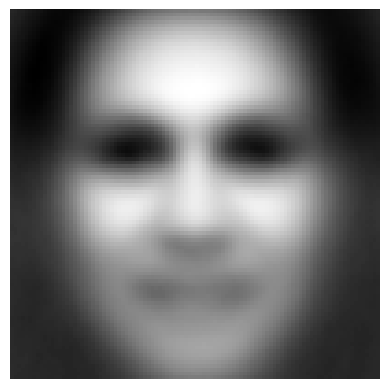

In [11]:
#visualize the mean face
plt.imshow(mean_face.reshape((100,100)),cmap="gray")
plt.axis("off")
plt.show()

In [13]:
#subtract the data with mean face
x_t = X - mean_face  # transformed data

**Apply transformed data into pca**
- Find the right number of components - Elbow
- with right number components conputer principle components

In [16]:
pca = PCA(n_components=None,whiten=True,svd_solver="auto")
pca.fit(x_t)

PCA(whiten=True)

In [18]:
exp_var_df = pd.DataFrame()
exp_var_df["explained_var"] = pca.explained_variance_ratio_
exp_var_df["cum_explained_var"] = exp_var_df["explained_var"].cumsum()
exp_var_df["principal_components"] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.250495,0.250495,1
1,0.114623,0.365118,2
2,0.104505,0.469623,3
3,0.052259,0.521882,4
4,0.033312,0.555194,5


<Axes: >

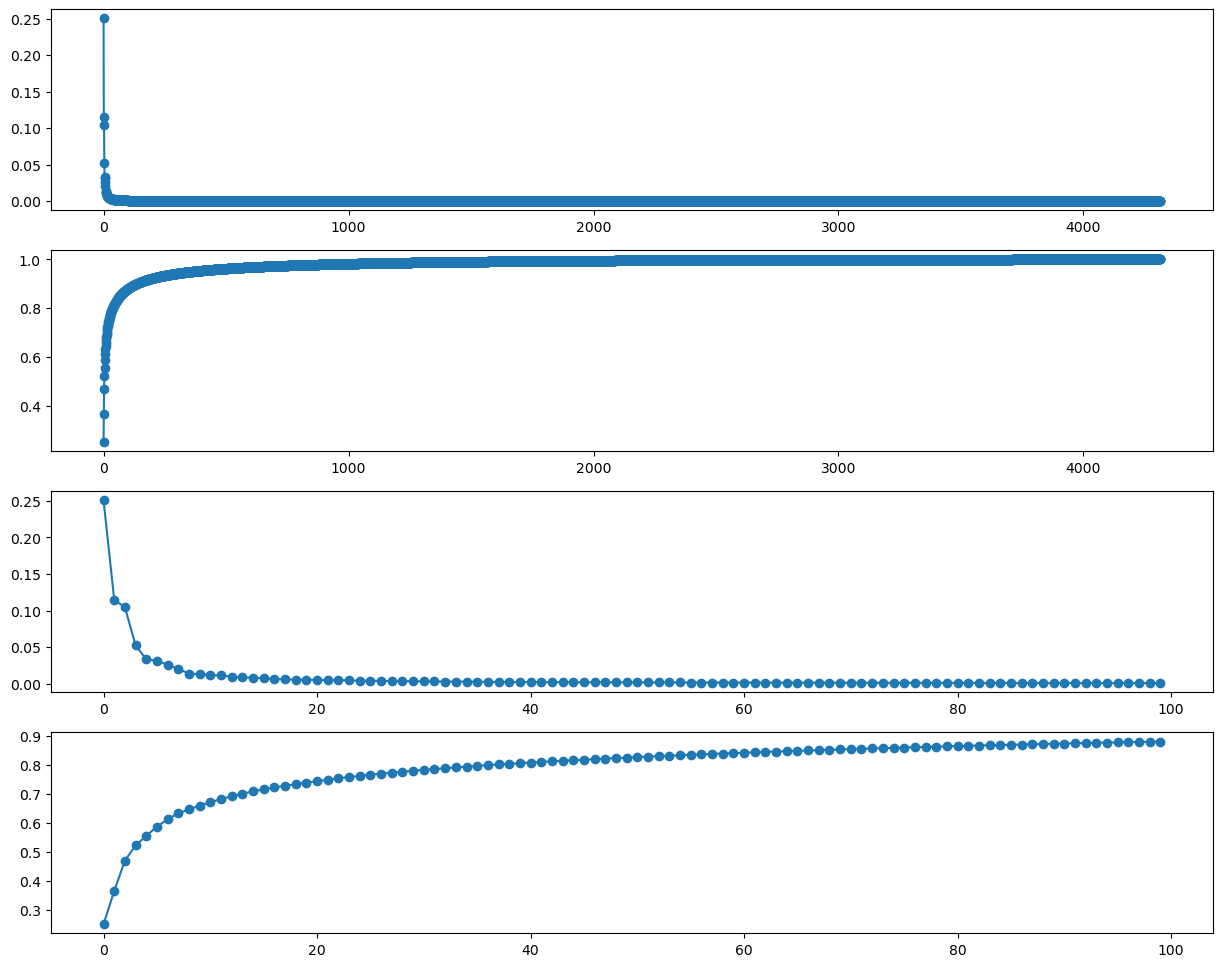

In [20]:
# visualize the variance
fig,ax = plt.subplots(nrows=4,figsize=(15,12))

exp_var_df["explained_var"].plot(kind="line",marker="o",ax=ax[0])
exp_var_df["cum_explained_var"].plot(kind="line",marker="o",ax=ax[1])

#to show 100 rows
exp_var_df["explained_var"].head(100).plot(kind="line",marker="o",ax=ax[2])
exp_var_df["cum_explained_var"].head(100).plot(kind="line",marker="o",ax=ax[3])

From Above plot
-
**Using Elbow Method**
- Pricipal component = 50
- Converge = 80%

In [23]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver="auto")
pca_data  = pca_50.fit_transform(x_t)

In [21]:
pca_data.shape

(4315, 50)

In [39]:
#saving data and model
y = data["Gender"].values  # independent variables
np.savez("./Data/data_pca_50",pca_data,y)

In [23]:
#saving the model
pca_dict = {"pca":pca_50,"mean face":mean_face}


In [24]:
pickle.dump(pca_dict,open("./Model/pca_dict.pickle","wb"))

#### Visualize Eigen Image

In [29]:
pca_data_inv = pca_50.inverse_transform(pca_data)
pca_data_inv.shape

(4315, 10000)

In [31]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

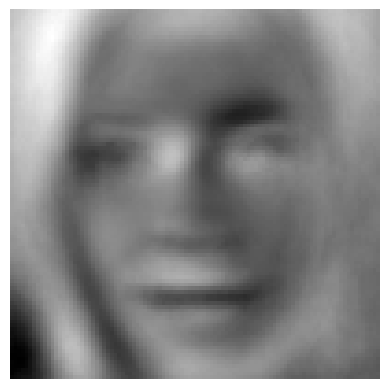

In [35]:
plt.imshow(eig_img,cmap="gray")
plt.axis("off")
plt.show()

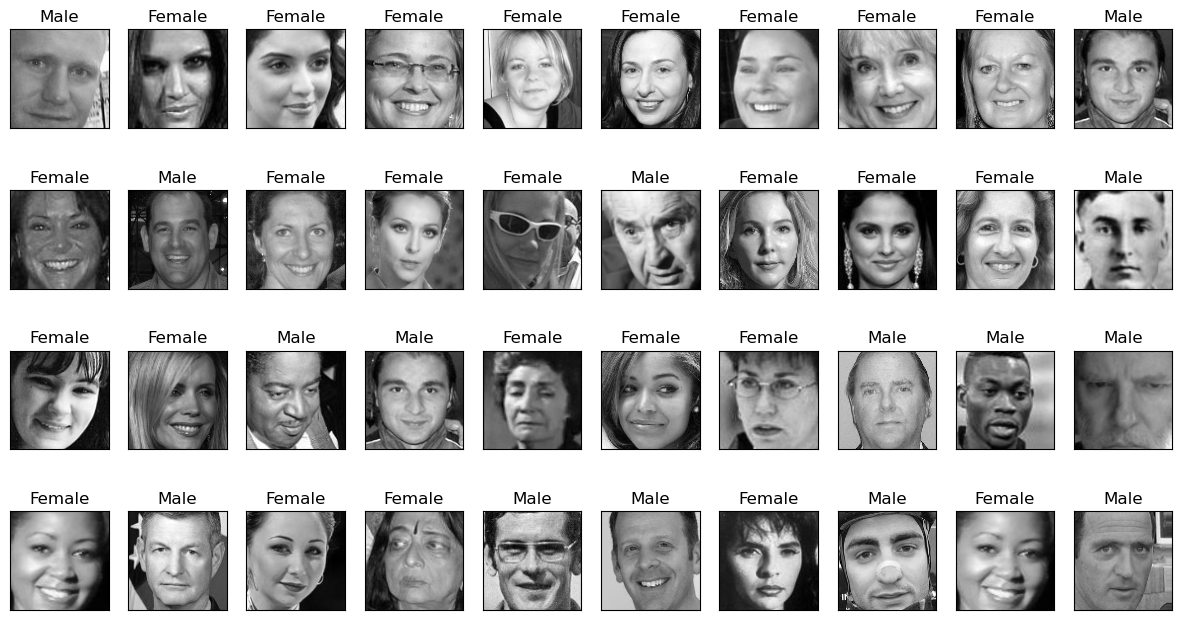

====================Eigen Images====================


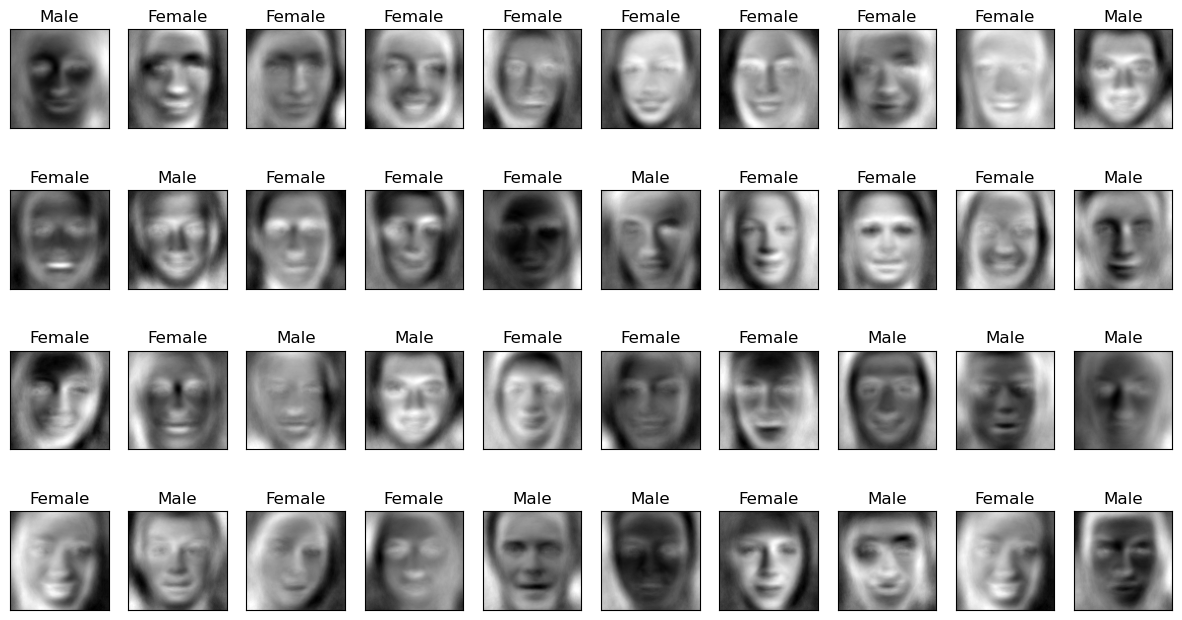

In [41]:
# showing 40 original images and their eigen images
np.random.seed(1001)
pics = np.random.randint(0,4315,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap="gray")
    plt.title("{}".format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+"Eigen Images"+"="*20)

plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap="gray")
    plt.title("{}".format(y[pic]))
    plt.xticks([])
    plt.yticks([])

plt.show()